# Exploratory Data Analysis on Dataset-Terrorism

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',engine='python',encoding='latin-1')

In [3]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
df.shape

(181691, 135)

In [5]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df=df.dropna(axis=1)

In [9]:
df.shape

(181691, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

# Exploratory Data Analysis 

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

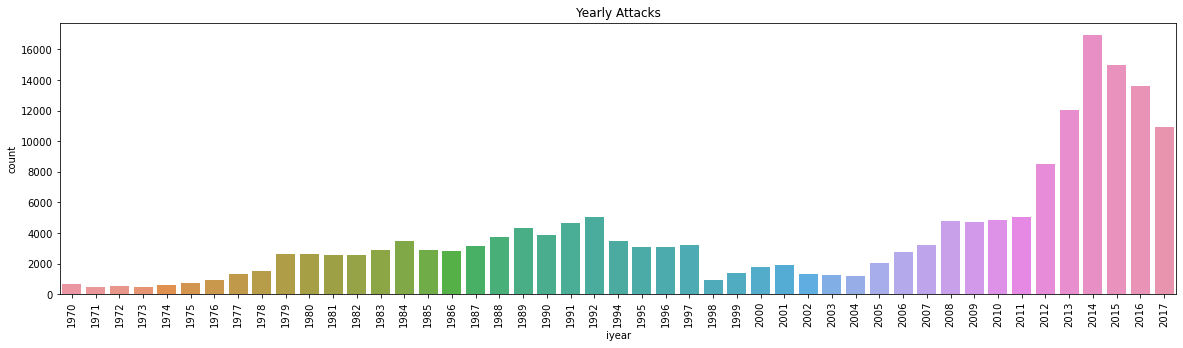

In [13]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Yearly Attacks')
sns.countplot(x=df.iyear);

<AxesSubplot:title={'center':'Weapons Type Analysis'}>

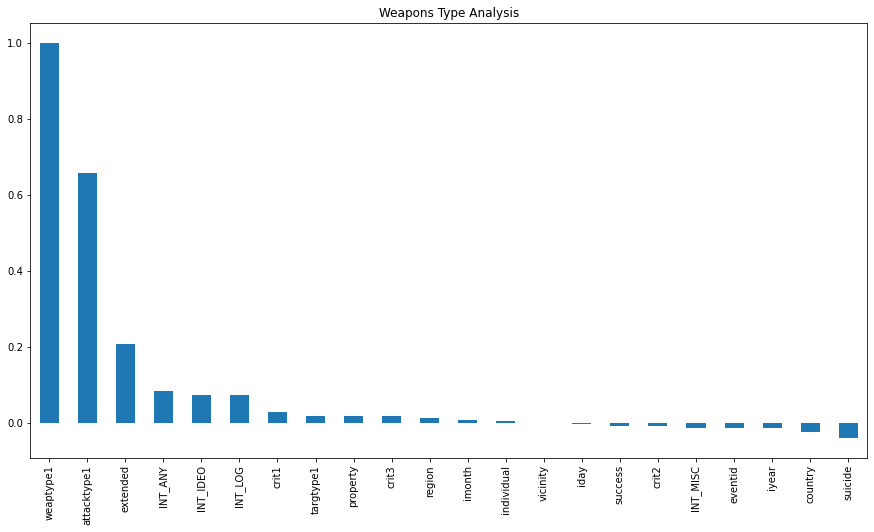

In [14]:
plt.figure(figsize=(15,8))
plt.title('Weapons Type Analysis')
df.corr()['weaptype1'].sort_values(ascending=False).plot(kind='bar')

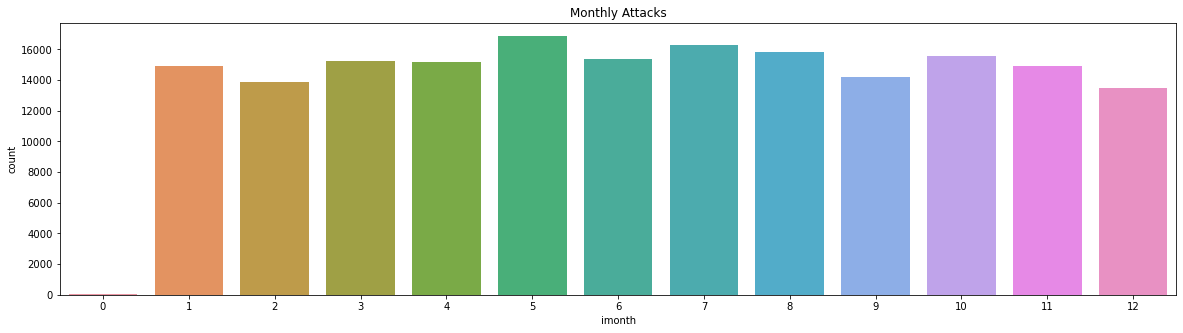

In [15]:
plt.figure(figsize=(20,5));
plt.title('Monthly Attacks')
sns.countplot(x=df.imonth);


<AxesSubplot:>

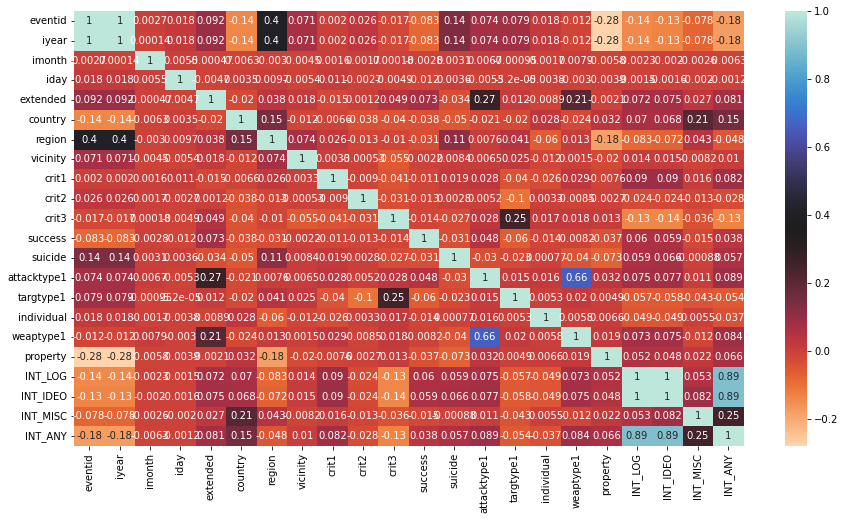

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='icefire_r',annot=True)

<AxesSubplot:title={'center':'Types of Attacks'}, ylabel='attacktype1'>

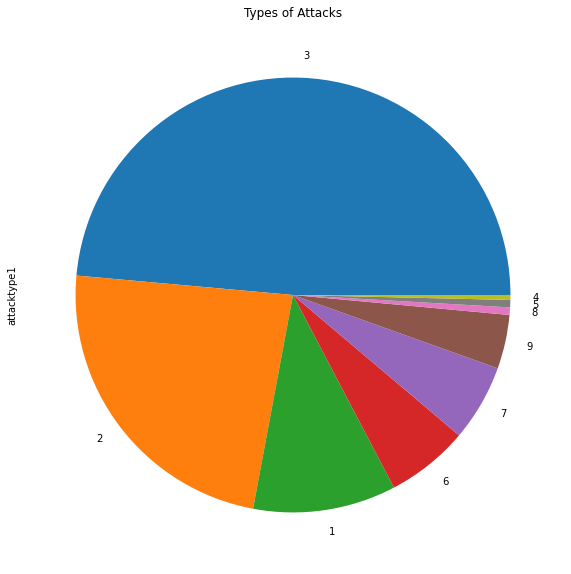

In [17]:
plt.figure(figsize=(10,10))
plt.title('Types of Attacks')
df['attacktype1'].value_counts().plot(kind='pie')

<AxesSubplot:title={'center':'Sucess of Attacks'}, xlabel='attacktype1_txt', ylabel='targtype1'>

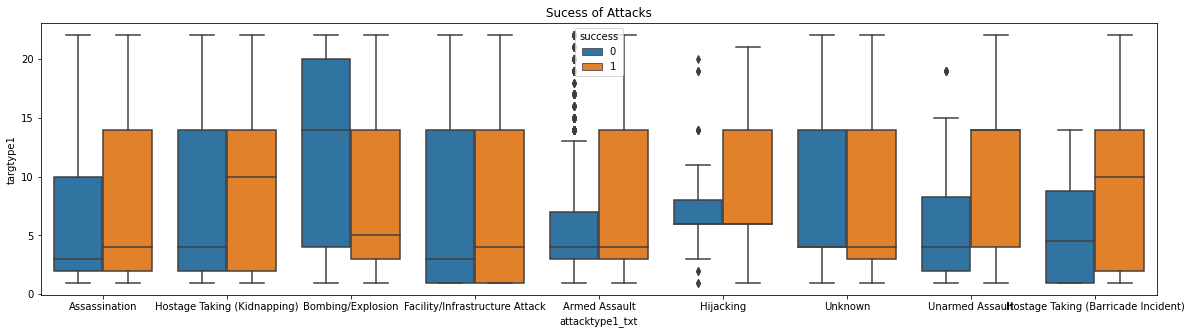

In [18]:
plt.figure(figsize=(20,5))
plt.title('Sucess of Attacks')
sns.boxplot(df['attacktype1_txt'],df['targtype1'],hue=df['success'])

# Exploratory Data Analysis Using Pandas Profiling

In [19]:
pip install pandas-profiling

In [20]:
from pandas_profiling import ProfileReport

In [21]:
prof=ProfileReport(df)

# EDA Report Produced By Pandas Profiling

In [22]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# storing the analysis report in a file

In [23]:
prof.to_file(output_file='EDA_Analysis.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]